This notebook presents the MCGLM usage in two examples, both used for my Master's qualification.

The cell below describes a simple usage of mcglm, only for instilling sake.

```
from mcglm import MCGLM, mc_id

mcglm = MCGLM(   
    endog=y,   
    exog=X,   
    z=[mc_id(X)],   
    link='log',   
    variance='tweedie'
    power=2
)   

mcglmresults = mcglm.fit()
mcglmresults.summary()

# residual analysis
plt.scatter(mcglmresults.mu, mcglmresults.pearson_residue)
plt.xlabel('mu')
plt.ylabel('pearson residue')
```

### First Example
 
`Sleepstudy` is a study of sleep deprivation.
https://www.rdocumentation.org/packages/lme4/versions/1.1-26/topics/sleepstudy

The average reaction time per day for subjects in a sleep deprivation study. On day 0 the subjects had their normal amount of sleep. Starting that night they were restricted to 3 hours of sleep per night. The observations represent the average reaction time on a series of tests given each day to each subject.


Gaussian Mixed Model is a good model for fitting this longitudinal data. MCGLM can mimic Gaussian Mixed Model, yet another specification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mcglm import MCGLM, mc_mixed, mc_id
from patsy import dmatrix


plt.style.use('fivethirtyeight')

In [2]:
# Pulling the dataset
sleepstudy = pd.read_csv('first_simulation/sleepstudy.csv', dtype={'Subject': 'str'})

sleepstudy.head(10)

,Reaction,Days,Subject
0,249.5600,0,308
1,258.7047,1,308
2,250.8006,2,308
3,321.4398,3,308
4,356.8519,4,308
5,414.6901,5,308
6,382.2038,6,308
7,290.1486,7,308
8,430.5853,8,308
9,466.3535,9,308


In [3]:
sleepstudy.describe()

,Reaction,Days
count,180.000000,180.000000
mean,298.507892,4.500000
std,56.328757,2.880293
min,194.332200,0.000000
25%,255.375825,2.000000
50%,288.650800,4.500000
75%,336.752075,7.000000
max,466.353500,9.000000


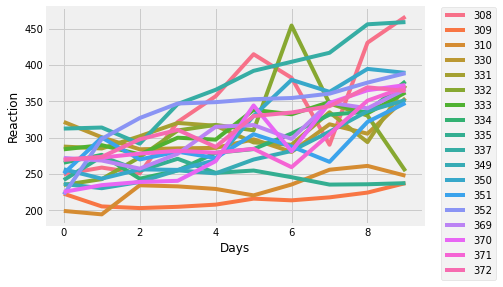

In [4]:
_ = sns.lineplot(x='Days', y='Reaction', hue='Subject', data=sleepstudy)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
X = dmatrix('~ Days', sleepstudy, return_type="dataframe")

In [6]:
# Z specification
Z = [mc_id(sleepstudy)] + mc_mixed(formula='~ 0 + Subject / Days', data = sleepstudy)

In [7]:
# Model fitting
mcglm = MCGLM(
    endog=sleepstudy['Reaction'],
    exog=X,
    z=Z
)

mcglmresults = mcglm.fit()

In [8]:
mcglmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
               Multivariate Covariance Generalized Linear Model               
==============================================================================
Dep. Variable:               Reaction   No. Iterations:                     20
Model:                          MCGLM   No. Observations:                  180
link:                        identity   Df Residuals:                      178
variance:                    constant   Df Model:                            6
Method:              Quasi-Likelihood   Power-fixed:                      True
Date:                Sun, 26 Jun 2022   pAIC                           1583.94
Time:                        18:44:37   pBIC                            1603.1
                                        pLogLik                      -785.9704
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.4051      6.632     37.906      0.000     238.406     264.404
Days          10.4673      1.502      6.968      0.000       7.523      13.412
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
dispersion_1   654.9420     70.624      9.274      0.000     516.521     793.363
dispersion_2   565.5150    264.679      2.137      0.033      46.753    1084.277
dispersion_3    32.6820     13.560      2.410      0.016       6.105      59.259
dispersion_4    11.0550     42.948      0.257      0.797     -73.121      95.231
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
power_         1.0000        nan        nan        nan         nan         nan
==============================================================================
"""

Report Analysis

Straight off the bat with beta coefficients. Intercept set in 251.40 indicates the average response time at day 0. In addition, Days at 10.46 allude to total change to response time by unit changes on Days for subjects with random effects set to 0. Furthermore, by the results of wald test on Days, we might conclude a significant effect on response time throughout the days.  

Dispersion parameters hold valuable information. The first dispersion parameter shows the random variance, meaning the whole variance, the second dispersion parameter is the variance of random intercept, the third is the variance of slope and the fourth is the correlation among the lines, that can be calculated through the formula = dispersion_4/(sqrt(dispersion_2) + sqrt(dispersion_3)). Cell below shows the pearson correlation result. 

In [9]:
import math 

11.05/(math.sqrt(565.51) + math.sqrt(32.68))

0.3746131416276374

Text(0, 0.5, 'pearson residue')

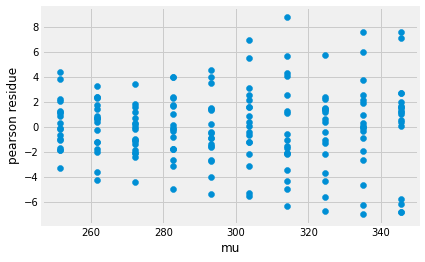

In [10]:
plt.scatter(mcglmresults.mu, mcglmresults.pearson_residue)
plt.xlabel('mu')
plt.ylabel('pearson residue')

In [20]:
# Model fitting
mcglm = MCGLM(
    endog=sleepstudy["Reaction"],
    exog=X,
    z=Z,
    link="log",
    variance="tweedie",
    power=1.3
)

mcglmresults = mcglm.fit()

ValueError: shapes (75,75) and (180,180) not aligned: 75 (dim 1) != 180 (dim 0)

In [12]:
mcglmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
               Multivariate Covariance Generalized Linear Model               
==============================================================================
Dep. Variable:               Reaction   No. Iterations:                     12
Model:                          MCGLM   No. Observations:                  180
link:                             log   Df Residuals:                      178
variance:                     tweedie   Df Model:                            6
Method:              Quasi-Likelihood   Power-fixed:                      True
Date:                Sun, 26 Jun 2022   pAIC                           1578.32
Time:                        18:44:42   pBIC                           1597.48
                                        pLogLik                      -783.1592
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5357      0.026    215.664      0.000       5.485       5.586
Days           0.0353      0.004      7.926      0.000       0.027       0.044
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
dispersion_1     0.6780      0.071      9.497      0.000       0.538       0.818
dispersion_2     0.7730      0.336      2.298      0.022       0.114       1.432
dispersion_3     0.0290      0.013      2.317      0.021       0.004       0.054
dispersion_4     0.0010      0.047      0.021      0.983      -0.091       0.093
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
power_         1.2000        nan        nan        nan         nan         nan
==============================================================================
"""

Text(0, 0.5, 'pearson residual')

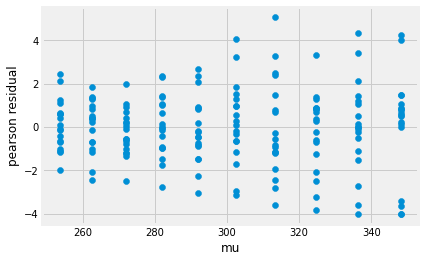

In [13]:
plt.scatter(mcglmresults.mu, mcglmresults.pearson_residue)
plt.xlabel('mu')
plt.ylabel('pearson residual')

### Second Example
 
`Soya` is a dataset that stores an experiment of Universidade Federal da Grande Dourados in Dourados, Mato Grosso do Sul, Brazil. Description:    
https://github.com/walmes/wzRfun/blob/master/R/wzRfun.R#L10   
http://ccarevista.ufc.br/seer/index.php/ccarevista/article/view/1454  

The experiment collected data about different treatments of potassium, water and blocks for soil farming. The pivotal traits to be studied are: grain size, total seeds and viable peas. In the following, MCGLM was used to fit into this data that has three unique kinds of answers: continuous, count and binomial.

In [14]:
soya = pd.read_csv('fourth_simulation/soya.csv', dtype={'block': 'str', 'water':'str', 'pot':'str'})

soya['viablepeasP'] = soya['viablepeas'] / soya['totalpeas']

In [15]:
soya.head(10)

,pot,water,block,grain,seeds,viablepeas,totalpeas,viablepeasP
0,0,37.5,I,14.55,136,22,56,0.392857
1,30,37.5,I,21.51,159,2,62,0.032258
2,60,37.5,I,24.62,156,0,66,0.000000
3,120,37.5,I,21.88,171,2,68,0.029412
4,180,37.5,I,28.11,190,0,82,0.000000
5,0,50,I,17.16,140,20,63,0.317460
6,30,50,I,24.44,193,6,86,0.069767
7,60,50,I,28.50,200,6,94,0.063830
8,120,50,I,32.94,208,7,86,0.081395
9,180,50,I,28.76,237,10,97,0.103093


In [16]:
soya['viablepeasP'] = soya['viablepeas'] / soya['totalpeas']

X = dmatrix('~ block + water * pot', soya, return_type="dataframe")

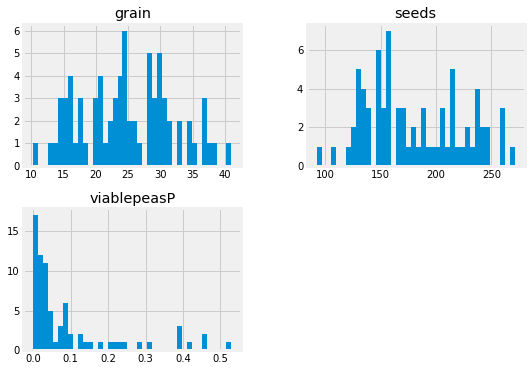

In [56]:
# histogram of target variables.

_ = soya[['grain', 'seeds', 'viablepeasP']].hist(bins=40, figsize=(8, 6))

In [57]:
# Model fitting
mcglm = MCGLM(
    endog=[soya['grain'], soya['seeds'], soya['viablepeasP']],
    exog=[X, X, X],
    z=[[mc_id(soya)], [mc_id(soya)], [mc_id(soya)]],
    link=['identity', 'log', 'logit'],
    variance=['constant', 'tweedie', 'binomialP'],
    power_fixed=[True, True, True],
    ntrial=[None, None, soya['totalpeas'].values],
    power=[1,1,0]
)


mcglmresults = mcglm.fit()

In [58]:
mcglmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
               Multivariate Covariance Generalized Linear Model               
==============================================================================
Dep. Variable:                  grain   No. Iterations:                     10
Model:                          MCGLM   No. Observations:                   75
link:                        identity   Df Residuals:                       56
variance:                    constant   Df Model:                           20
Method:              Quasi-Likelihood   Power-fixed:                      True
Date:                Sun, 26 Jun 2022   pAIC                            527.82
Time:                        18:59:44   pBIC                            596.14
                                        pLogLik                      -243.9082
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   14.2280      1.217     11.687      0.000      11.842      16.614
block[T.II]                  1.1345      0.880      1.290      0.197      -0.590       2.859
block[T.III]                -0.7545      0.880     -0.858      0.391      -2.479       0.970
block[T.IV]                 -1.5317      0.880     -1.741      0.082      -3.256       0.192
block[T.V]                  -2.3650      0.880     -2.688      0.007      -4.089      -0.641
water[T.50]                  2.1707      1.531      1.418      0.156      -0.830       5.172
water[T.62.5]                2.5430      1.531      1.661      0.097      -0.458       5.544
pot[T.120]                  11.7897      1.531      7.701      0.000       8.789      14.790
pot[T.180]                  11.8714      1.531      7.754      0.000       8.871      14.872
pot[T.30]                    6.7924      1.531      4.436      0.000       3.792       9.793
pot[T.60]                   10.4074      1.531      6.798      0.000       7.407      13.408
water[T.50]:pot[T.120]       2.2552      2.165      1.042      0.298      -1.989       6.499
water[T.62.5]:pot[T.120]     5.5843      2.165      2.579      0.010       1.341       9.828
water[T.50]:pot[T.180]       1.2048      2.165      0.556      0.578      -3.039       5.449
water[T.62.5]:pot[T.180]     9.2331      2.165      4.264      0.000       4.989      13.477
water[T.50]:pot[T.30]        0.1000      2.165      0.046      0.963      -4.144       4.344
water[T.62.5]:pot[T.30]     -1.8709      2.165     -0.864      0.388      -6.115       2.373
water[T.50]:pot[T.60]        2.5928      2.165      1.197      0.231      -1.651       6.837
water[T.62.5]:pot[T.60]      3.3509      2.165      1.548      0.122      -0.893       7.595
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
dispersion_1     5.8620      1.673      3.503      0.000       2.583       9.141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
power_         1.0000        nan        nan        nan         nan         nan
               Multivariate Covariance Generalized Linear Model               
==============================================================================
Dep. Variable:                  seeds   No. Iterations:                     10
Model:                          MCGLM   No. Observations:                   75
link:                             log   Df Residuals:                       56
variance:                     tweedie   Df Model:                           20
Me

------------------
Analysis of grain size.

To recap, the goal is analyzing how covariates block, water and potassium act on response grain. I've moduled as a OLS, and the variance adjusted for the Normal response is 5.86. By the Wald test, potassium levels are significant to grain size; the higher the level, bigger grain size. Residual analysis:

Text(0, 0.5, 'pearson residual')

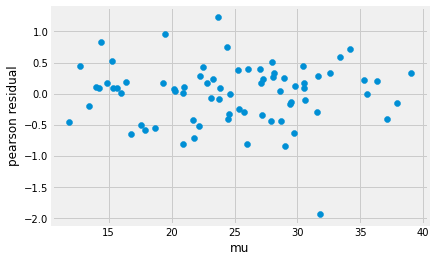

In [59]:
#grain
plt.scatter(mcglmresults.mu[0], mcglmresults.pearson_residue[0])
plt.xlabel('mu')
plt.ylabel('pearson residual')

Despite the outlier, the fit seems pretty good.

------------------
Analysis of seed count.

I've moduled as a model close to Poisson GLM. By the Wald test, potassium levels are significant to grain size; the higher the level, higher count. Also, level V for block is significant. Residual analysis:

Text(0, 0.5, 'pearson residual')

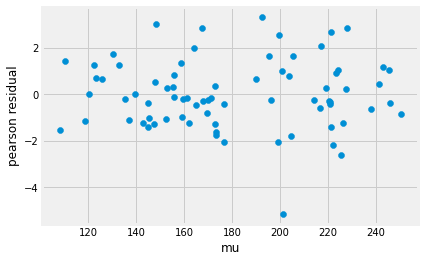

In [60]:
#seeds
plt.scatter(mcglmresults.mu[1], mcglmresults.pearson_residue[1])
plt.xlabel('mu')
plt.ylabel('pearson residual')

Despite the outlier, the fit seems pretty good.

------------------
Analysis of seed count.

I've moduled as a model close to Logistic GLM. By the Wald test, only potassium 'level 30' and water 'level 50' seem significant to the task. Residual Analysis:

Text(0, 0.5, 'pearson residual')

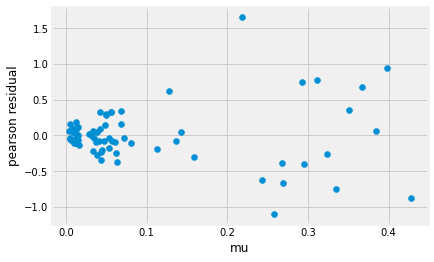

In [31]:
#viablepeasP
plt.scatter(mcglmresults.mu[2], mcglmresults.pearson_residue[2])
plt.xlabel('mu')
plt.ylabel('pearson residual')

The model adjustment does not look good. It is possible to try out different values for link and variance functions. If it does not improve the model fit, it will let us conclude a non-assessment for the percentage of viable peas from current covariates.